#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/content/imdb_top_10000.txt", delimiter='\t')
df.head()


tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [41]:
df.isna().sum()

tt0111161                          0
The Shawshank Redemption (1994)    0
1994                               0
 9.2                               0
619479                             0
142 mins.                          0
Crime|Drama                        1
dtype: int64

In [42]:
df = pd.read_csv("/content/imdb_top_10000.txt", delimiter = '\t', names = ['imdbID','title','year','score','votes','runtime','genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [43]:
df.shape

(10000, 7)

In [44]:
df.dropna(subset=['genres'], inplace=True)
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [45]:
df.shape

(9999, 7)

In [46]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

Which movies is best in terms of votes??

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [47]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [48]:
set_genre = set()

In [49]:
for genres in df.genres:
  set_genre.update(genres.split("|"))
len(set_genre)

24

In [50]:
for genres in set_genre:
  df[genres] = [genres in row.split("|") for row in df.genres]
  

In [51]:
genredf = df[list(set_genre)]
genredf.head()

Western  Film-Noir  Romance    War  Family  Adventure  Comedy  History  \
0    False      False    False  False   False      False   False    False   
1    False      False    False  False   False      False   False    False   
2    False      False    False  False   False      False   False    False   
3    False      False    False  False   False       True   False    False   
4    False      False    False  False   False       True   False    False   

   Drama  Thriller  ...  Adult   News  Mystery  Musical  Reality-TV  Action  \
0   True     False  ...  False  False    False    False       False   False   
1  False      True  ...  False  False    False    False       False   False   
2   True      True  ...  False  False     True    False       False   False   
3  False     False  ...  False  False    False    False       False    True   
4  False      True  ...  False  False    False    False       False    True   

   Horror  Sport  Animation  Crime  
0   False  False      False   True  
1   False  False      False   True  
2   False  False      False  False  
3   False  False      False  False  
4   False  False      False  False  

[5 rows x 24 columns]

In [52]:
df['title']=[t[0:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Western  Film-Noir  Romance  ...  Adult  \
0                       Crime|Drama    False      False    False  ...  False   
1                    Crime|Thriller    False      False    False  ...  False   
2            Drama|Mystery|Thriller    False      False    False  ...  False   
3           Action|Adventure|Sci-Fi    False      False    False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False      False    False  ...  False   

    News  Mystery  Musical  Reality-TV  Action  Horror  Sport  Animation  \
0  False    False    False       False   False   False  False      False   
1  False    False    False       False   False   False  False      False   
2  False     True    False       False   False   False  False      False   
3  False    False    False       False    True   False  False      False   
4  False    False    False       False    True   False  False      False   

   Crime  
0   True  
1   True  
2  False  
3  False  
4  False  

[5 rows x 31 columns]

## 4. EDA

In [53]:
newdf = df[['title','score','votes']]
newdf

title  score   votes
0     The Shawshank Redemption    9.2  619479
1                 Pulp Fiction    9.0  490065
2                   Fight Club    8.8  458173
3                   The Matrix    8.7  448114
4                    Inception    8.9  385149
...                        ...    ...     ...
9995                   Meduzot    7.0    1357
9996            Daltry Calhoun    5.2    1357
9997    The Quiller Memorandum    6.5    1356
9998                      Taal    6.5    1356
9999            The Navigators    6.9    1356

[9999 rows x 3 columns]

In [54]:
minvotes=newdf['votes'].min()
print("The minimum vote for a movie is", minvotes)
maxvotes = newdf['votes'].max()
print("The maximum votes is", maxvotes)

The minimum vote for a movie is 1356
The maximum votes is 619479


In [55]:
yeardf = df.groupby("year")
df1994 = yeardf.get_group(1994)

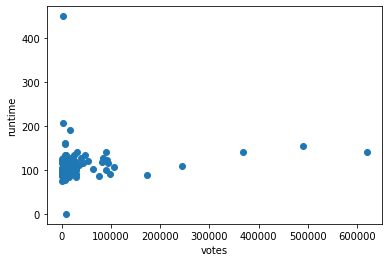

In [56]:
x = df1994.votes
y = df1994.runtime

plt.scatter(x,y)
plt.xlabel('votes')
plt.ylabel('runtime')
plt.show()

In [57]:
year94 = yeardf[['votes','runtime']].mean()[:10]

<function matplotlib.pyplot.show>

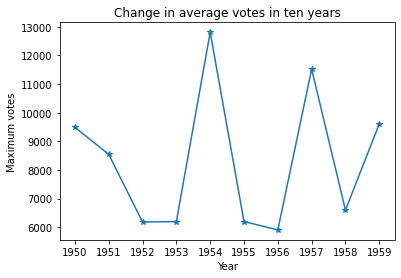

In [58]:
plt.plot(year94.index,year94.votes,marker='*')
plt.xticks(year94.index)
plt.title('Change in average votes in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum votes")
plt.show

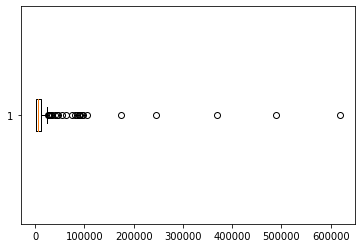

In [59]:
plt.boxplot(df1994.votes,vert=False)
plt.show()

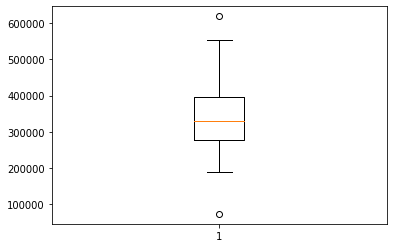

In [60]:
year20 = yeardf[['votes','runtime']].max()[-20:]
plt.boxplot(year20.votes)
plt.show()

## 5. Determining Best Movies

In [61]:
bestmoviedf= df.groupby("year")
bestmoviedf



In [62]:
len(bestmoviedf)

62

In [63]:
check_year= df.groupby("year", sort=False)
check_year

In [64]:
for key, valuedf in check_year:
    highest_votes = valuedf[valuedf['votes'] == valuedf.votes.max()]
    print(highest_votes.title,highest_votes.year,highest_votes.votes)
    break

0    The Shawshank Redemption
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    619479
Name: votes, dtype: int64


Therefore, The Shawshank Redemption is the best book with highest votes.

## 6. Trends in Popularity of Genres

In [65]:
dfgenre = df[list(set_genre)]
dfgenre.head()

Western  Film-Noir  Romance    War  Family  Adventure  Comedy  History  \
0    False      False    False  False   False      False   False    False   
1    False      False    False  False   False      False   False    False   
2    False      False    False  False   False      False   False    False   
3    False      False    False  False   False       True   False    False   
4    False      False    False  False   False       True   False    False   

   Drama  Thriller  ...  Adult   News  Mystery  Musical  Reality-TV  Action  \
0   True     False  ...  False  False    False    False       False   False   
1  False      True  ...  False  False    False    False       False   False   
2   True      True  ...  False  False     True    False       False   False   
3  False     False  ...  False  False    False    False       False    True   
4  False      True  ...  False  False    False    False       False    True   

   Horror  Sport  Animation  Crime  
0   False  False      False   True  
1   False  False      False   True  
2   False  False      False  False  
3   False  False      False  False  
4   False  False      False  False  

[5 rows x 24 columns]

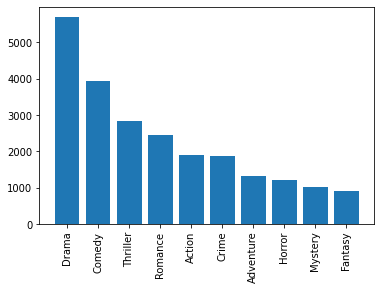

In [66]:
y = dfgenre.sum().sort_values(ascending=False)[:10]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()